# Homework 8: Problems

### ASTROINFORMATICS
https://github.com/astromundus/astroinfo2018/blob/master/homework/HW8.ipynb



## Problem 1:  Unsupervised classification using GMM

Apply Gausian Mixture Model (GMM) to the 4-D data from the last week's Homework Problem: 
the g-i and u-g colors, and Amplitude and logP determined from light curves.
You can use the astroML code from textbook figure 6.6 to search for clusters
(hint: adapt the GMM code we used in notebook for Week 8 for asteroids).

Assume that there are no more than 30 physical clusters.
a) plot BIC (and AIC if you want) as a function of the assumed number of 
clusters; what is the optimal number of clusters?
b) plot logP vs. g-i diagram and overplot ellipses (1.5 sigma level as in fig. 6.6) 
outlining each class for the best number of clusters.
c) what fraction of sample belongs to the most populous cluster (hint: look at gmm_best.weights_ variable)




<br>
# Homework 8: Solutions

### Some useful definitions and functions

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm, Normalize
from scipy.stats import norm
from scipy.spatial import cKDTree
from scipy.stats import gaussian_kde
from sklearn.mixture import GaussianMixture as GMM
from sklearn.neighbors import KernelDensity
from astroML.datasets import fetch_LINEAR_geneva
from astroML.datasets import fetch_great_wall
from astroML.plotting.tools import draw_ellipse
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=15, usetex=True)

## Problem : Gausian Mixture Model

First obtain LINEAR data for 6,146 stars using astroML built-in function: 

In [54]:
data = fetch_LINEAR_geneva()
# N.B. this is a 7-dimensional dataset
ug = data['ug']
gi = data['gi']
logP = data['logP']
A = data['amp']
# will need for GMM clustering analysis
X = np.vstack([data['gi'], data['logP'],data['ug'], data['amp']]).T

In [62]:
N = np.arange(1, 31)
def compute_GMM(N, covariance_type='full', max_iter=1000):
    models = [None for n in N]
    for i in range(len(N)):
        models[i] = GMM(n_components=N[i], max_iter=max_iter,
                        covariance_type=covariance_type)
        models[i].fit(X)
    return models

models = compute_GMM(N)

AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

i_best = np.argmin(BIC)
gmm_best = models[i_best]
print ("best fit converged:", gmm_best.converged_)
print ("BIC: n_components =  %i" % N[i_best])
print ("BIC calculated the optimal number of clusters to be =  %i" % N[i_best])

best fit converged: True
BIC: n_components =  14
BIC calculated the optimal number of clusters to be =  14


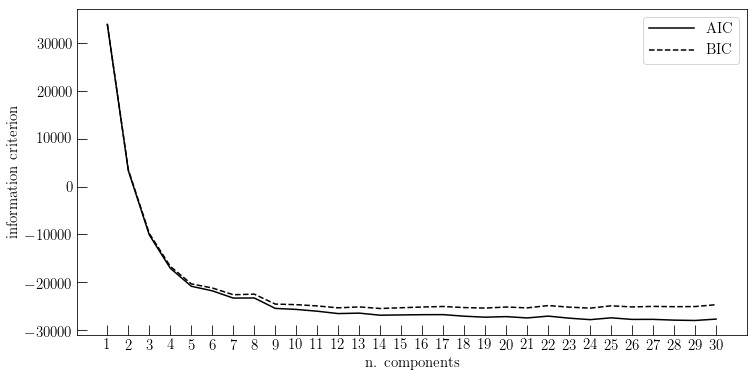

In [63]:
fig = plt.figure(figsize = (12, 6))

# plot 2: AIC and BIC
ax = fig.add_subplot(111)
ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 10)
ax.xaxis.set_ticks(np.arange(1, 31, 1))
ax.plot(N, AIC, '-k', label = 'AIC')
ax.plot(N, BIC, '--k', label = 'BIC')
ax.set_xlabel('n. components')
ax.set_ylabel('information criterion')
ax.legend(loc = 1)


plt.show()

0 11 0.191527780906 0.191527780906
1 13 0.137106996911 0.328634777818
2 9 0.134471885294 0.463106663112
3 4 0.126906050144 0.590012713256
4 2 0.0915298662816 0.681542579538
5 12 0.0811940213925 0.76273660093
6 3 0.0548337818715 0.817570382802
7 10 0.0469219064152 0.864492289217
8 6 0.0395641188976 0.904056408115
9 5 0.0369786853248 0.941035093439
10 8 0.0252631761265 0.966298269566
11 7 0.0211104633157 0.987408732881
12 0 0.0121031447625 0.999511877644
13 1 0.000488122356004 1.0


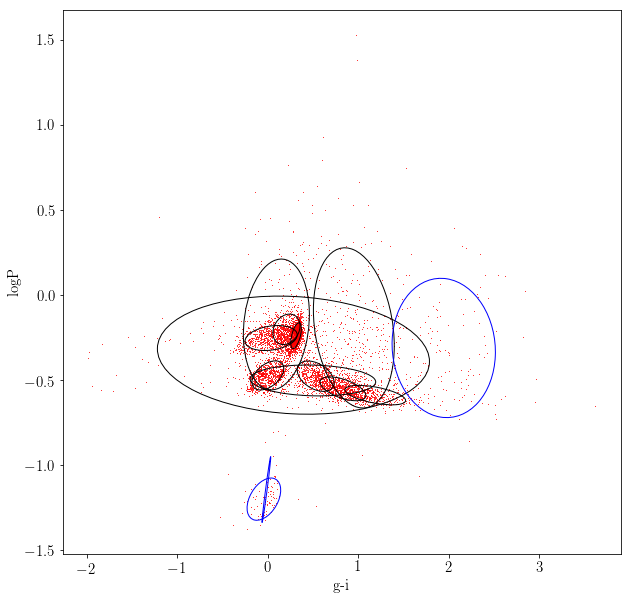

In [64]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)

ax.scatter( gi,logP, c='red', s=1, lw=0)
x=0
ind = np.argsort(gmm_best.weights_)[::-1]
for cnt, i in enumerate(ind[:N[i_best]]):
    mu = gmm_best.means_[i]
    C = gmm_best.covariances_[i]
    w = gmm_best.weights_[i]
    x+=w
    print(cnt, i, w, x)
    if (cnt>10):
        draw_ellipse(mu, C, scales=[1.5], ax=ax, fc='none', lw=1.0, ec='blue')
    else:
        draw_ellipse(mu, C, scales=[1.5], ax=ax, fc='none', lw=1.0, ec='k')

ax.set_ylabel('logP')
ax.set_xlabel('g-i')

plt.show()

The next graph is just to put the ellipses where it covers the major part. The number of ellipses (6) was chosen when the BIC graph stopped falling significantly with number.

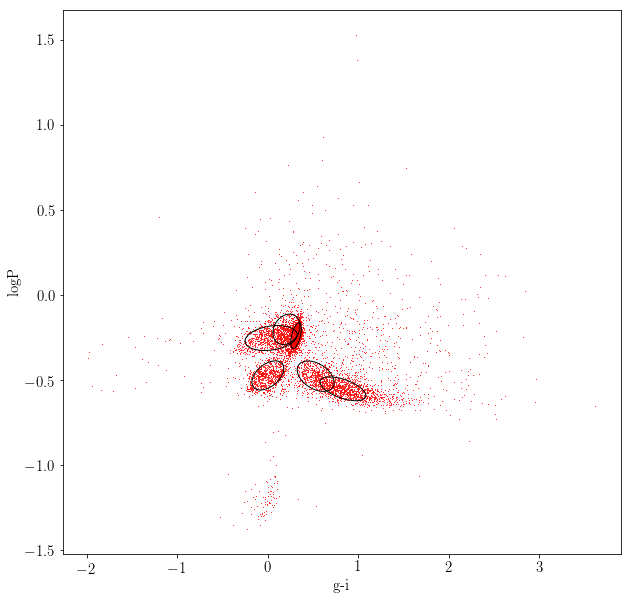

In [67]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)

ax.scatter( gi, logP, c='red', s=1, lw=0)
x=0
ind = np.argsort(gmm_best.weights_)[::-1]
for cnt, i in enumerate(ind[:N[i_best]]):
    mu = gmm_best.means_[i]
    C = gmm_best.covariances_[i]
    w = gmm_best.weights_[i]
    if (cnt<=5):
        draw_ellipse(mu, C, scales=[1.5], ax=ax, fc='none', lw=1.0, ec='k')

ax.set_ylabel('logP')
ax.set_xlabel('g-i')

plt.show()

## Most populous cluster

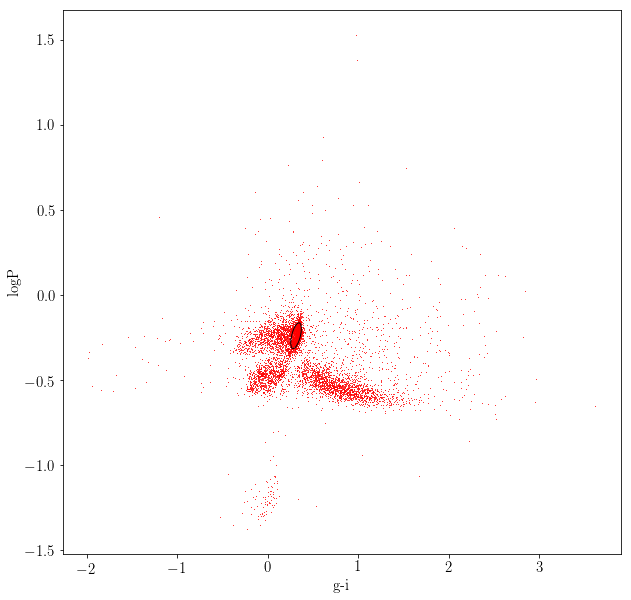

In [68]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)

ax.scatter( gi, logP, c='red', s=1, lw=0)

ind = np.argsort(gmm_best.weights_)[::-1]
for cnt, i in enumerate(ind[:N[i_best]]):
    mu = gmm_best.means_[i]
    C = gmm_best.covariances_[i]
    w = gmm_best.weights_[i]
    if (i==ind[0]):
        draw_ellipse(mu, C, scales=[1.5], ax=ax, fc='none', lw=1.0, ec='k')

ax.set_ylabel('logP')
ax.set_xlabel('g-i')

plt.show()

In [69]:
w = gmm_best.weights_[ind[0]]
print("The fraction of data in most popolous cluster is %f"%w)

The fraction of data in most popolous cluster is 0.191528
